# Pratical 7
## Generate N-grams of the text.

In [1]:
from nlp_lib import *

### Loading Dataset

In [3]:
df=pd.read_csv("Fake_Real_Data.csv")

In [4]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [5]:
df.columns

Index(['Text', 'label'], dtype='object')

In [6]:
df.shape

(9900, 2)

In [7]:
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [8]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


### Mapping Target Values to Numerial Value

In [9]:
df["Label_map"]=df["label"].map({"Fake":0,"Real":1})

In [10]:
df.head()

,Text,label,Label_map
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


### Importing Different Classifiers 

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 

### Splitting Data into Training and Testing sets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df['Text'],
                                                    df.Label_map,
                                                    test_size=0.2,
                                                    random_state=2022,
                                                    stratify=df.Label_map)

### Training Model using KNN Classifier

In [13]:
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=10,metric="euclidean")
}

# Loop through classifiers and train each
for name, clf in classifiers.items():
    print(f"\nTraining with {name}")
    
    # Create pipeline for each classifier
    pipeline = Pipeline([
        ('CountVectorizer', CountVectorizer(ngram_range=(1, 3))),
        ('classifier', clf)
    ])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(x_test)
    
    # Print classification report
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred,zero_division=0))


Training with KNeighborsClassifier
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.74      0.72      1980
weighted avg       0.81      0.73      0.72      1980



In [14]:
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=10,metric="cosine")
}

# Loop through classifiers and train each
for name, clf in classifiers.items():
    print(f"\nTraining with {name}")
    
    # Create pipeline for each classifier
    pipeline = Pipeline([
        ('CountVectorizer', CountVectorizer(ngram_range=(1, 3))),
        ('classifier', clf)
    ])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(x_test)
    
    # Print classification report
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred,zero_division=0))


Training with KNeighborsClassifier
Results for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1000
           1       0.69      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980



### Training Model using RandomForest Classifier

In [15]:
classifiers = {
    "RandomForestClassifier" :RandomForestClassifier()
}

# Loop through classifiers and train each
for name, clf in classifiers.items():
    print(f"\nTraining with {name}")
    
    # Create pipeline for each classifier
    pipeline = Pipeline([
        ('CountVectorizer', CountVectorizer(ngram_range=(3, 3))),#only try gram
        ('classifier', clf)
    ])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(x_test)
    
    # Print classification report
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred,zero_division=0))


Training with RandomForestClassifier
Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



### Training Model using Naive Bayes Classifier

In [16]:
classifiers = {
    'MultinomialNB':MultinomialNB(alpha=0.75)
}

# Loop through classifiers and train each
for name, clf in classifiers.items():
    print(f"\nTraining with {name}")
    
    # Create pipeline for each classifier
    pipeline = Pipeline([
        ('CountVectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('classifier', clf)
    ])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(x_test)
    
    # Print classification report
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred,zero_division=0))


Training with MultinomialNB
Results for MultinomialNB:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



### Pre-processing dataset and then training model again with above classifiers

In [17]:
df["Text"]=df["Text"].str.lower()

In [18]:
df['Text']=df['Text'].apply(remove_punctuations)

In [19]:
df['Text']=df['Text'].apply(remove_stopwords)

In [20]:
df['Text']=df['Text'].apply(tokenized_text)

In [21]:
df.head()

,Text,label,Label_map
0,"[top, trump, surrogate, brutally, stabs, back,...",Fake,0
1,"[us, conservative, leader, optimistic, common,...",Real,1
2,"[trump, proposes, us, tax, overhaul, stirs, co...",Real,1
3,"[court, forces, ohio, allow, millions, illegal...",Fake,0
4,"[democrats, say, trump, agrees, work, immigrat...",Real,1


In [22]:
df['text']=df['Text'].apply(wordnet_lemmatizing)

In [23]:
df.head()

,Text,label,Label_map,text
0,"[top, trump, surrogate, brutally, stabs, back,...",Fake,0,"[top, trump, surrogate, brutally, stab, back, ..."
1,"[us, conservative, leader, optimistic, common,...",Real,1,"[u, conservative, leader, optimistic, common, ..."
2,"[trump, proposes, us, tax, overhaul, stirs, co...",Real,1,"[trump, proposes, u, tax, overhaul, stir, conc..."
3,"[court, forces, ohio, allow, millions, illegal...",Fake,0,"[court, force, ohio, allow, million, illegally..."
4,"[democrats, say, trump, agrees, work, immigrat...",Real,1,"[democrat, say, trump, agrees, work, immigrati..."


In [24]:
df['text_join']=df['text'].apply(lambda x: " ".join(x))

In [25]:
df.head()

,Text,label,Label_map,text,text_join
0,"[top, trump, surrogate, brutally, stabs, back,...",Fake,0,"[top, trump, surrogate, brutally, stab, back, ...",top trump surrogate brutally stab back ‘ he ’ ...
1,"[us, conservative, leader, optimistic, common,...",Real,1,"[u, conservative, leader, optimistic, common, ...",u conservative leader optimistic common ground...
2,"[trump, proposes, us, tax, overhaul, stirs, co...",Real,1,"[trump, proposes, u, tax, overhaul, stir, conc...",trump proposes u tax overhaul stir concern def...
3,"[court, forces, ohio, allow, millions, illegal...",Fake,0,"[court, force, ohio, allow, million, illegally...",court force ohio allow million illegally purge...
4,"[democrats, say, trump, agrees, work, immigrat...",Real,1,"[democrat, say, trump, agrees, work, immigrati...",democrat say trump agrees work immigration bil...


In [26]:
#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting

X_train, X_test, y_train, y_test = train_test_split(
    df['text_join'], 
    df.Label_map,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.Label_map
)

In [27]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.95      1000
           1       0.98      0.92      0.95       980

    accuracy                           0.95      1980
   macro avg       0.96      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



### Printing & Plotting Confusion Matrix for Trained Model

In [28]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[986,  14],
       [ 79, 901]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

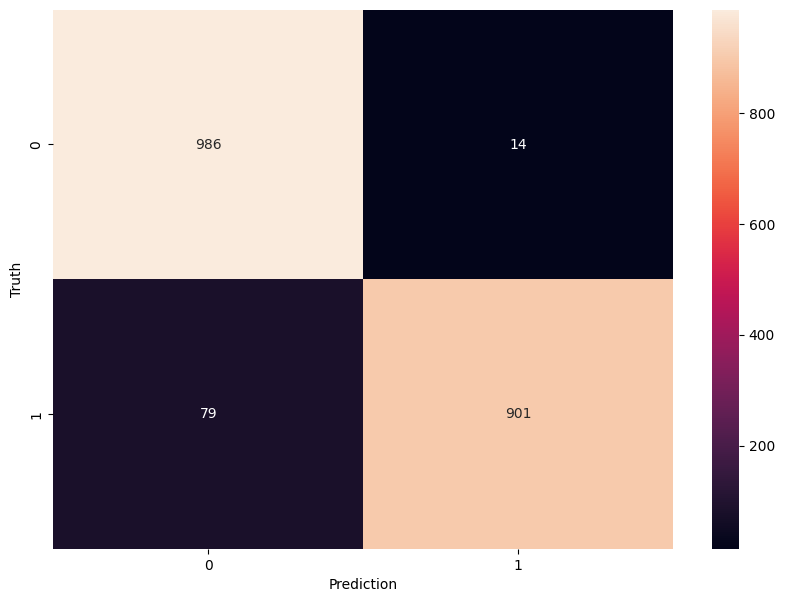

In [29]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      0.99      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980

[[968  32]
 [  5 975]]


Text(95.72222222222221, 0.5, 'Truth')

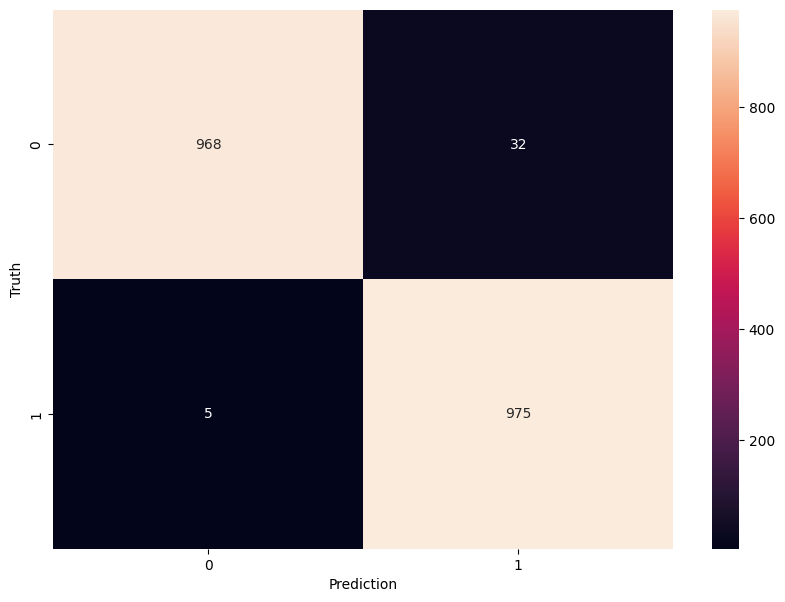

In [30]:

clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1,2))),                       #using the ngram_range parameter 
    ('clf', (MultinomialNB(alpha=0.75)))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1000
           1       0.85      0.98      0.91       980

    accuracy                           0.91      1980
   macro avg       0.91      0.91      0.90      1980
weighted avg       0.92      0.91      0.90      1980

[[829 171]
 [ 17 963]]


Text(95.72222222222221, 0.5, 'Truth')

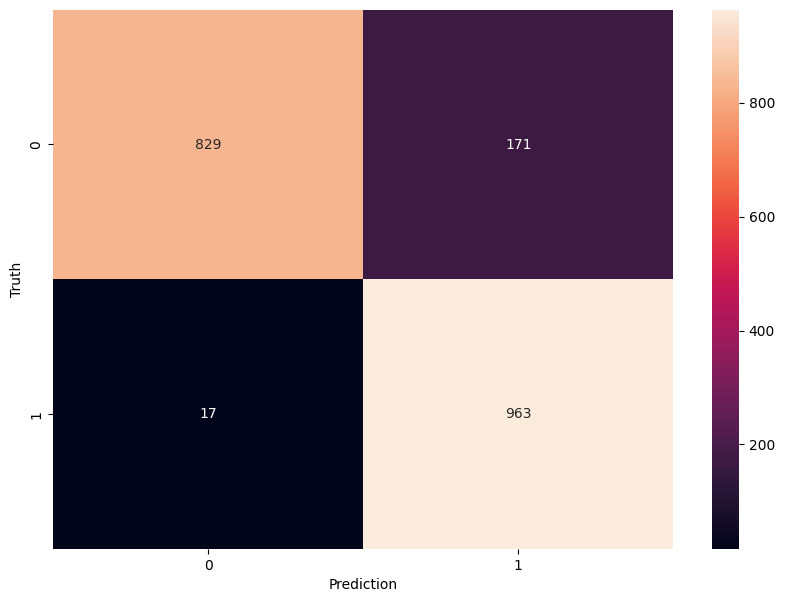

In [32]:

clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1,3))),                       #using the ngram_range parameter 
    ('clf', KNeighborsClassifier(n_neighbors=10,metric="cosine"))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

              precision    recall  f1-score   support

           0       1.00      0.01      0.03      1000
           1       0.50      1.00      0.67       980

    accuracy                           0.50      1980
   macro avg       0.75      0.51      0.35      1980
weighted avg       0.75      0.50      0.34      1980

[[ 15 985]
 [  0 980]]


Text(95.72222222222221, 0.5, 'Truth')

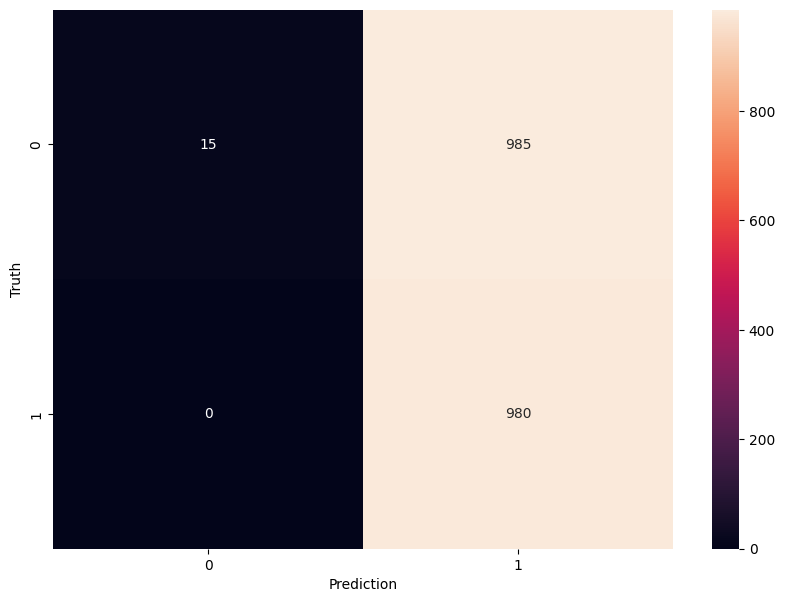

In [33]:

clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1,3))),                       #using the ngram_range parameter 
    ('clf', KNeighborsClassifier(n_neighbors=10,metric="euclidean"))      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')